In [101]:
import pandas as pd
import numpy as np
import csv
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [102]:
#read in the file
df = pd.read_csv("CAERS_ASCII_2004_2017Q2.csv")
df.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [103]:
df['SYM_One Row Coded Symptoms'] = df['SYM_One Row Coded Symptoms'].str.split('\s*,\s*')

In [104]:
print(len(df['PRI_Reported Brand/Product Name'].unique()))
len(df['PRI_FDA Industry Name'].unique())

45685


41

In [105]:
df1 = (
    df.set_index('PRI_FDA Industry Name')['SYM_One Row Coded Symptoms'].explode()
    .rename('symptoms').groupby(level=0).value_counts().reset_index(name='count')
)

In [106]:
top_15_industries_by_freq = df['PRI_FDA Industry Name'].value_counts().index.tolist()[:15]

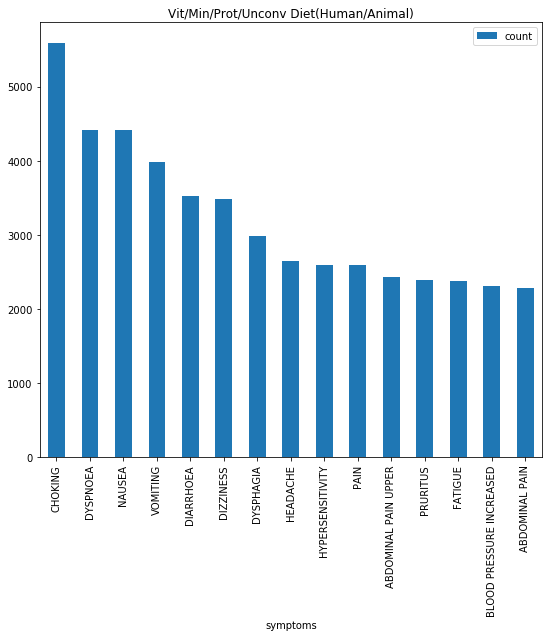

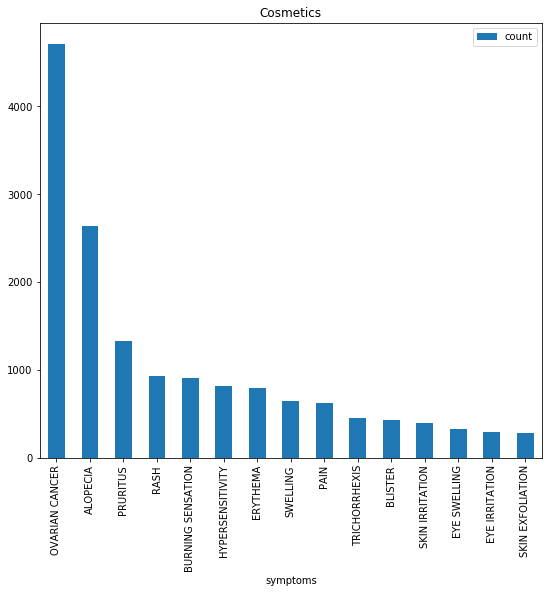

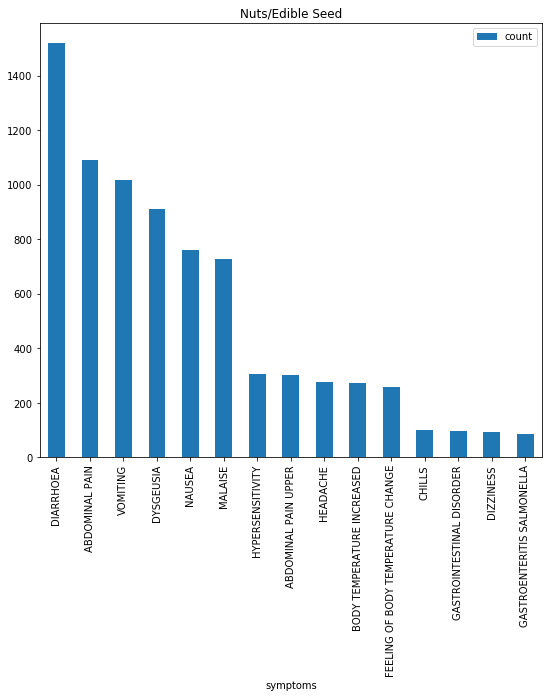

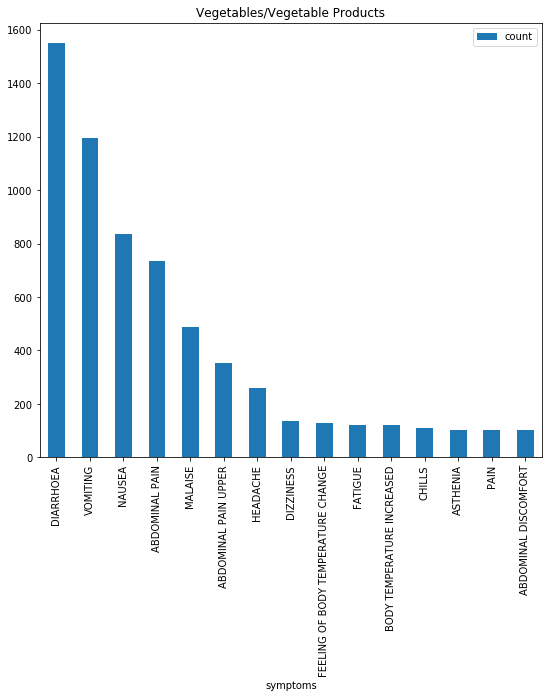

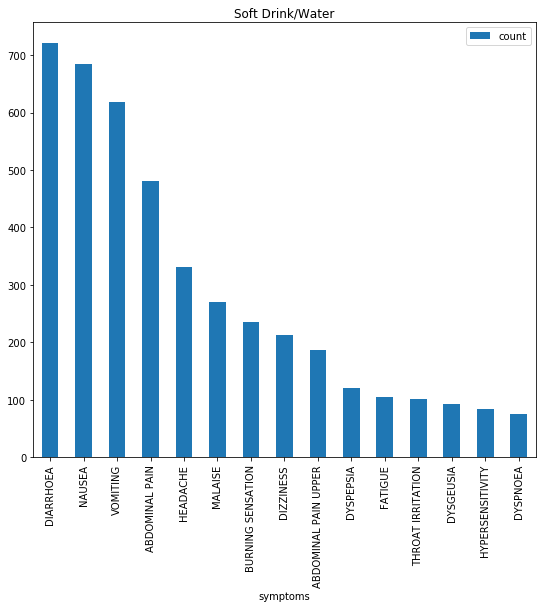

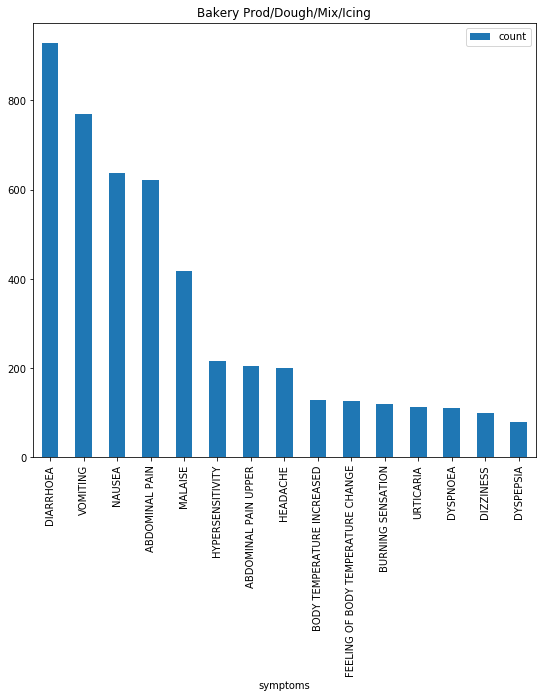

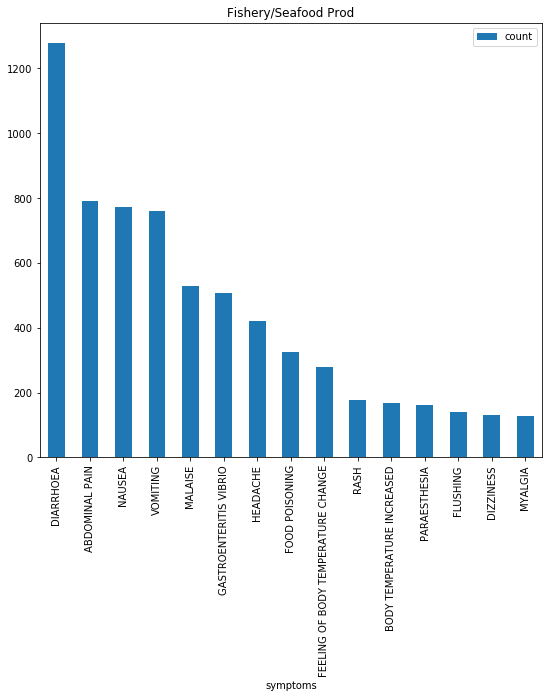

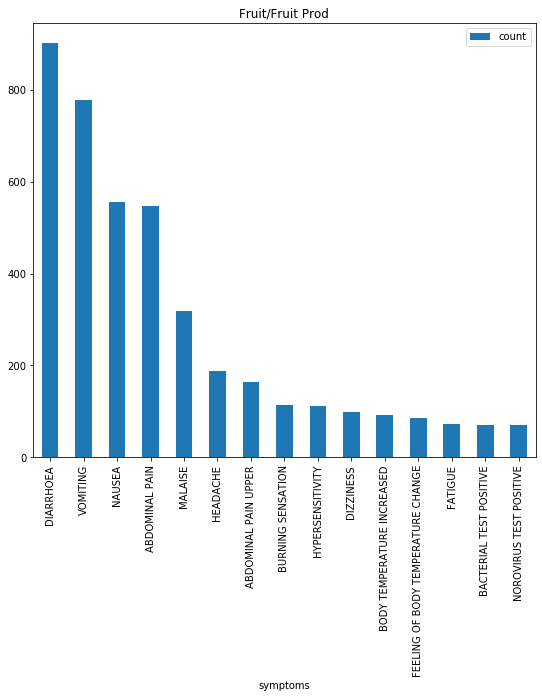

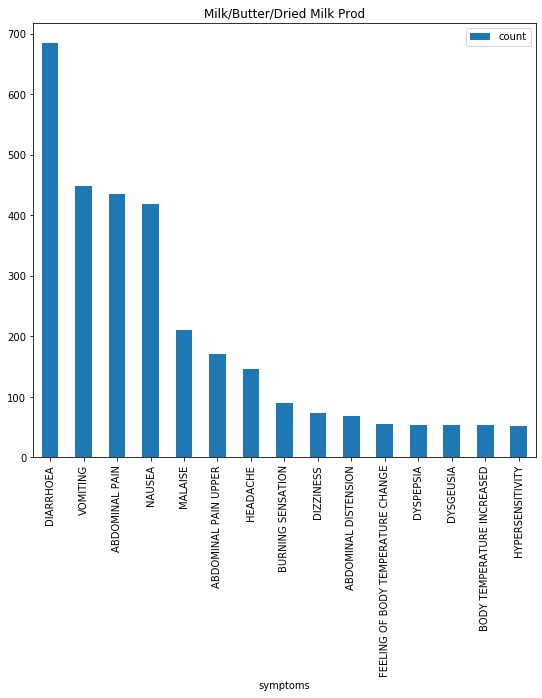

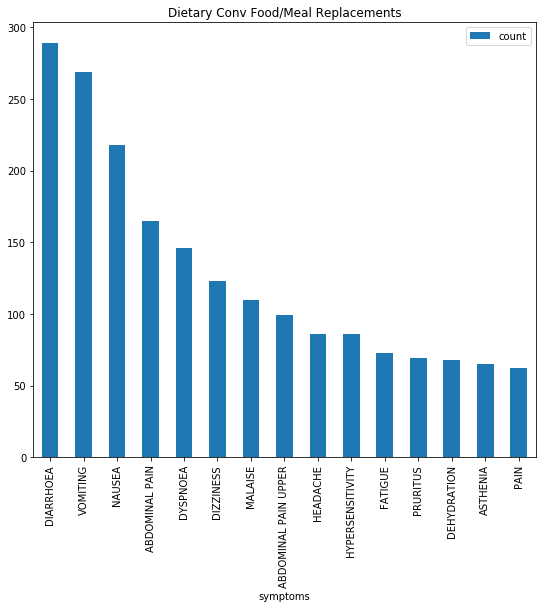

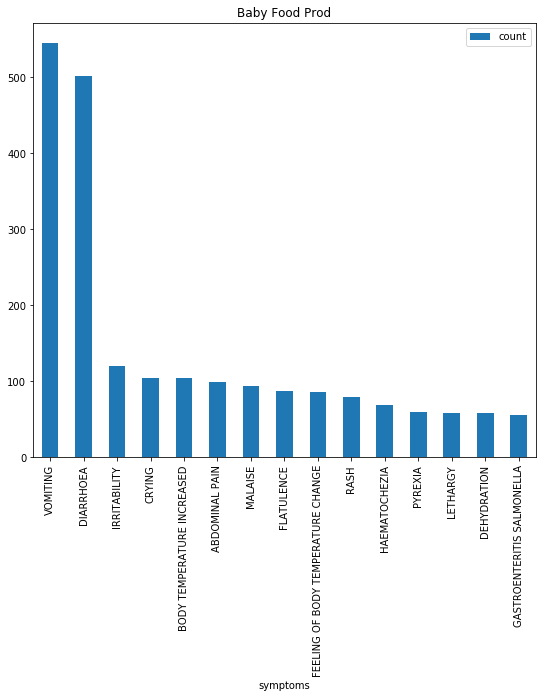

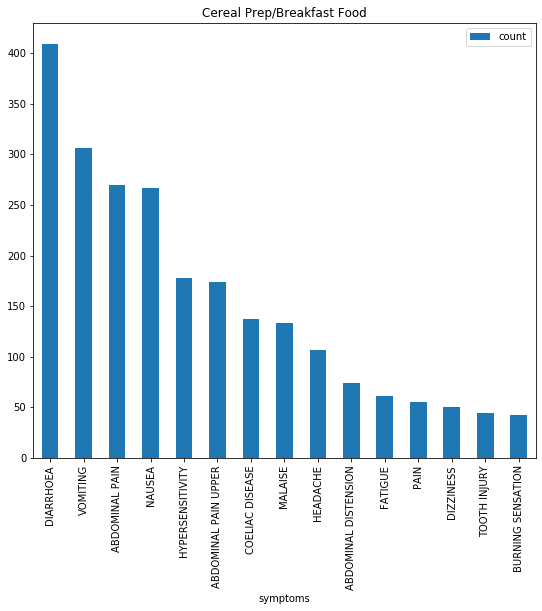

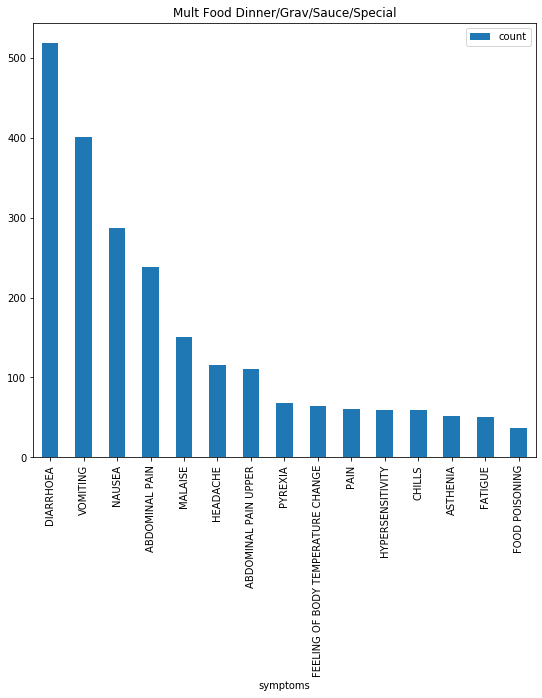

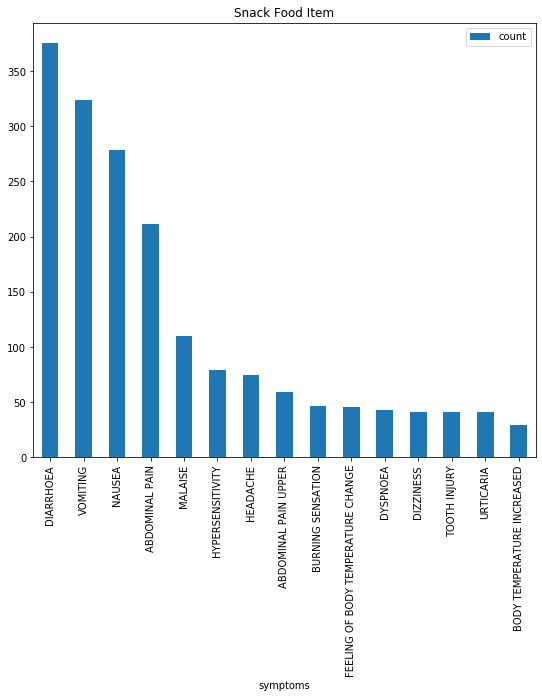

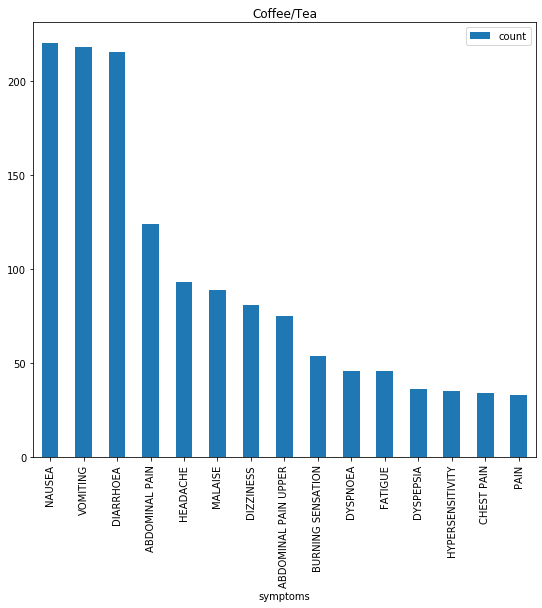

In [107]:
for industry in top_15_industries_by_freq:
    plot_df=df1.loc[df1['PRI_FDA Industry Name'] == str(industry)].sort_values('count', ascending=False)[:15]
    plot_df.plot(x="symptoms",y= "count", kind="bar", figsize=(9, 8))
    plt.title(industry)
    plt.show()

In [108]:
df['AEC_One Row Outcomes'] = df['AEC_One Row Outcomes'].str.split('\s*,\s*')

In [109]:
df2 = (
    df.set_index('PRI_FDA Industry Name')['AEC_One Row Outcomes'].explode()
    .rename('outcomes').groupby(level=0).value_counts().reset_index(name='count')
)
df2

,PRI_FDA Industry Name,outcomes,count
0,Alcoholic Beverage,VISITED AN ER,14
1,Alcoholic Beverage,HOSPITALIZATION,12
2,Alcoholic Beverage,NON-SERIOUS INJURIES/ ILLNESS,11
3,Alcoholic Beverage,LIFE THREATENING,6
4,Alcoholic Beverage,VISITED A HEALTH CARE PROVIDER,4
...,...,...,...
388,Whole Grain/Milled Grain Prod/Starch,LIFE THREATENING,13
389,Whole Grain/Milled Grain Prod/Starch,DISABILITY,10
390,Whole Grain/Milled Grain Prod/Starch,REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.,7
391,Whole Grain/Milled Grain Prod/Starch,NONE,1


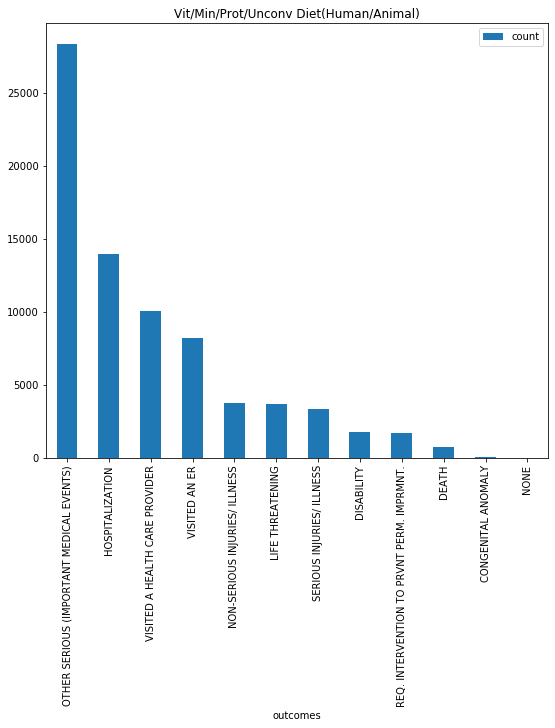

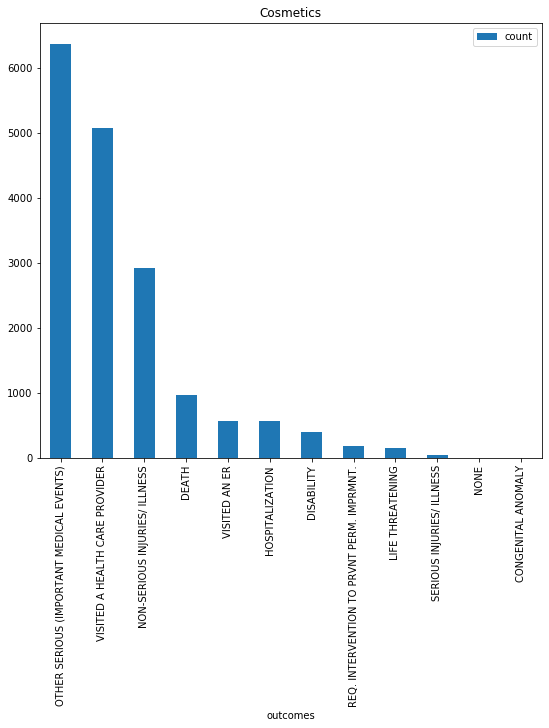

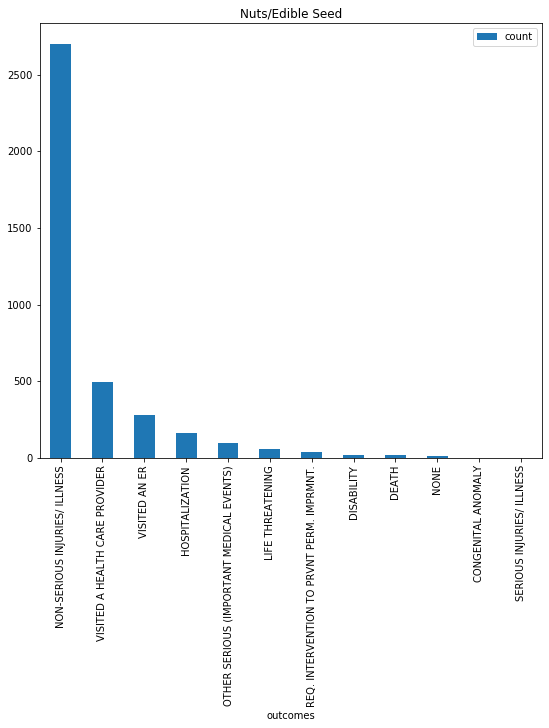

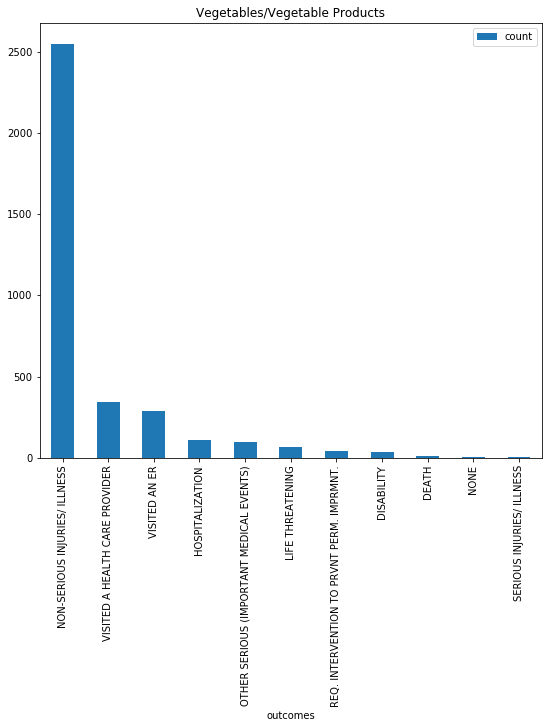

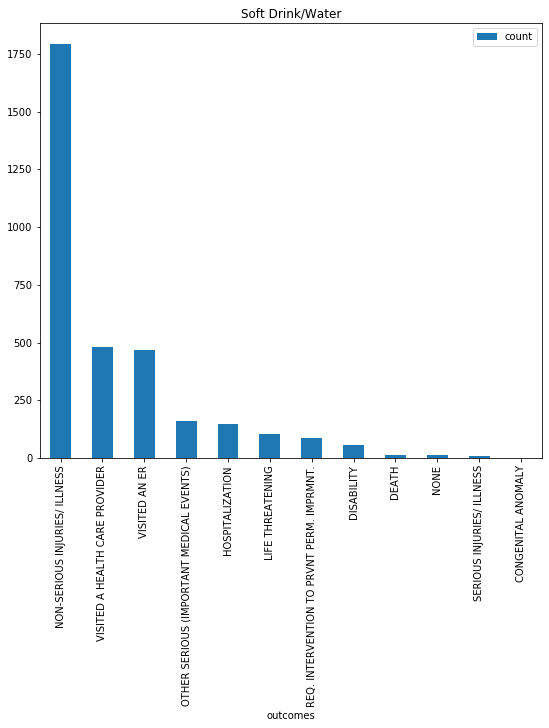

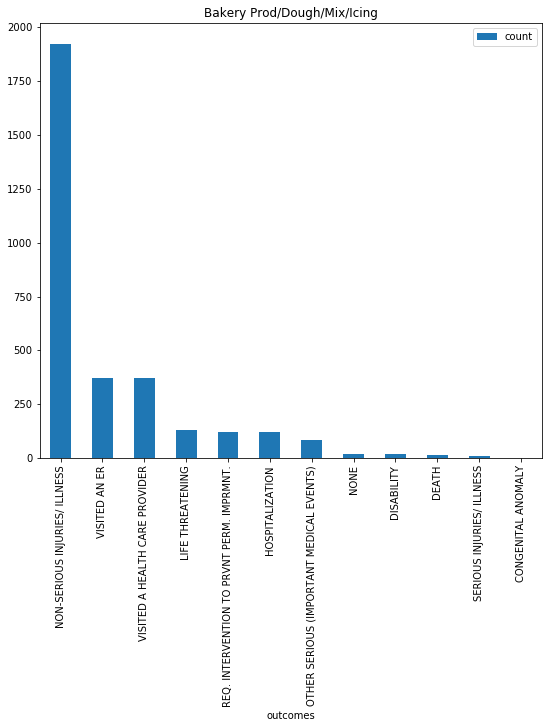

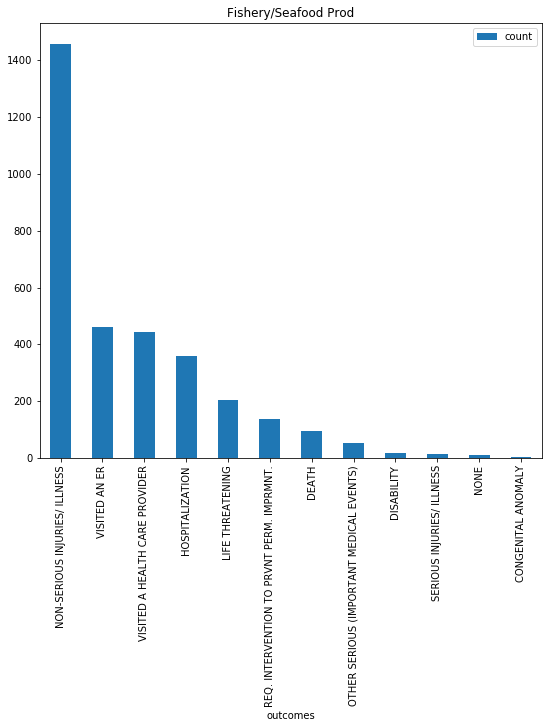

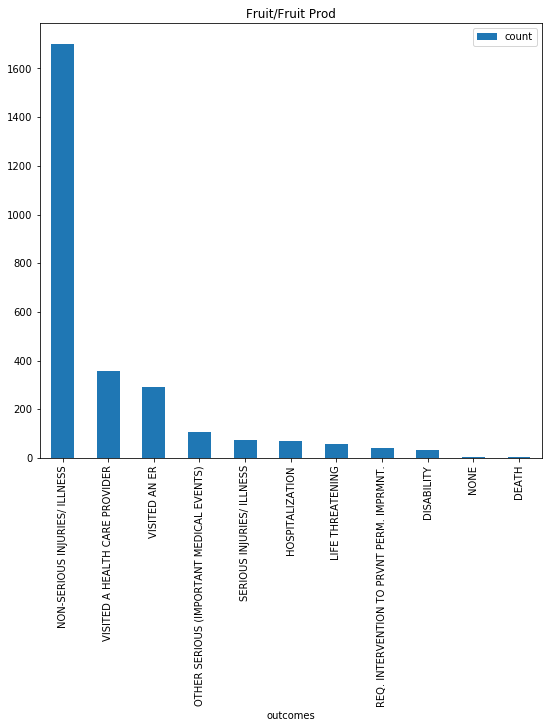

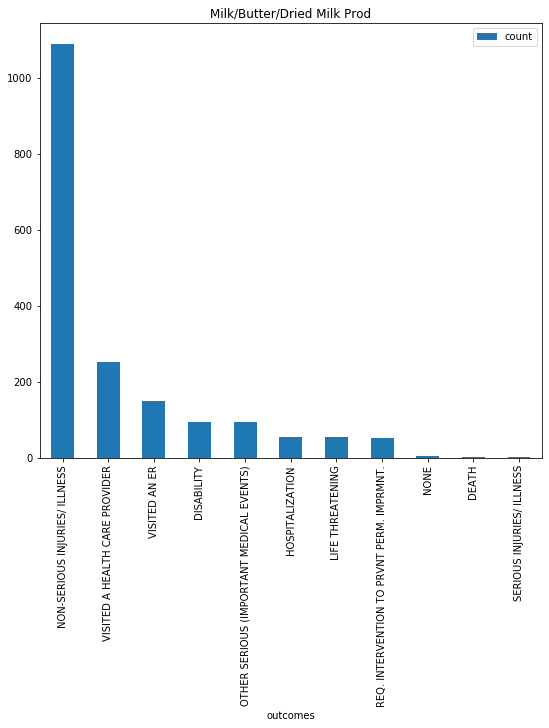

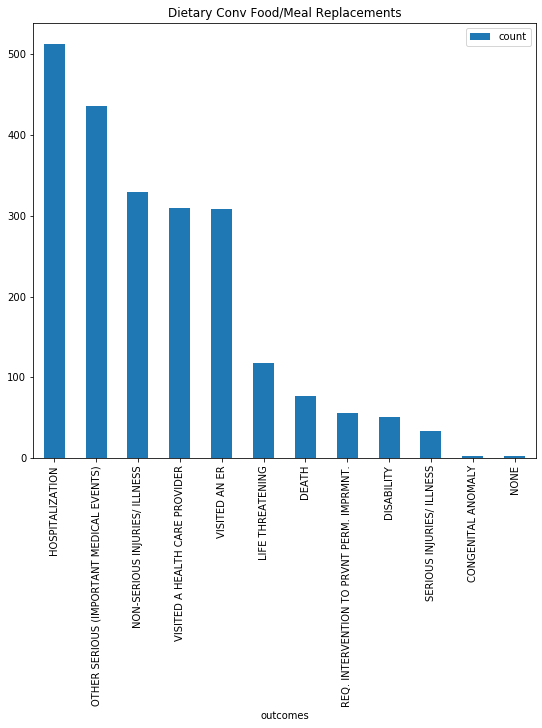

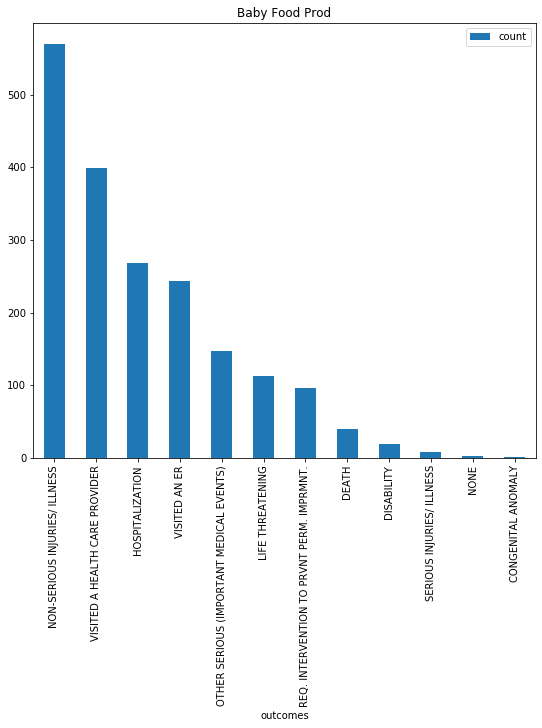

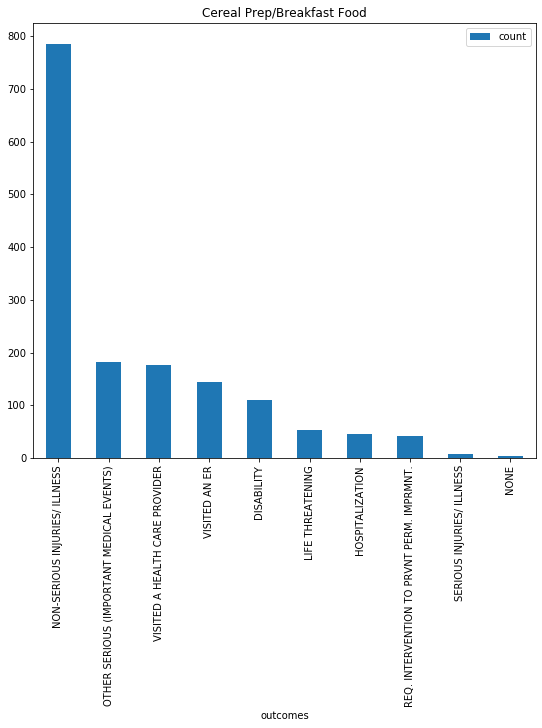

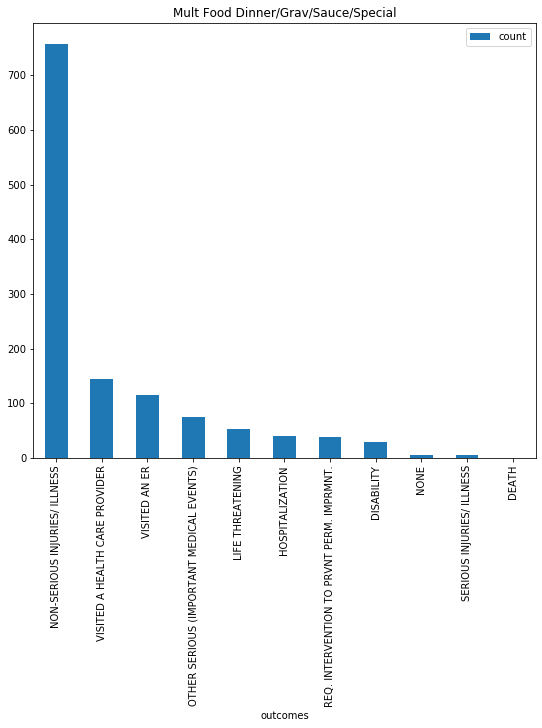

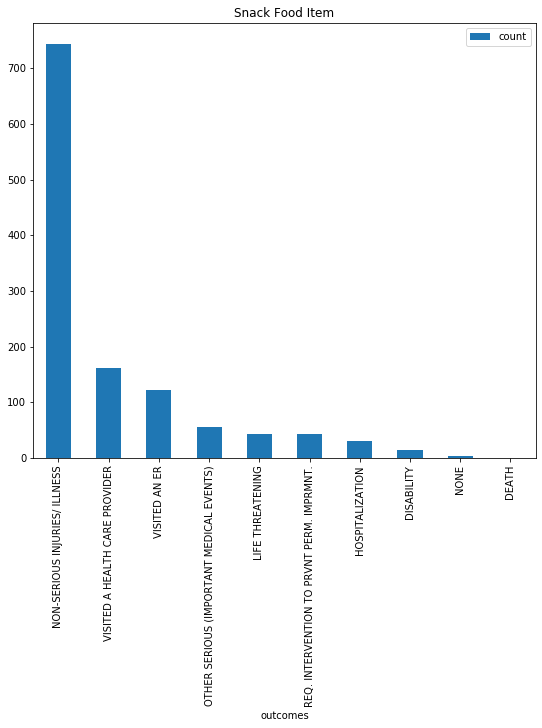

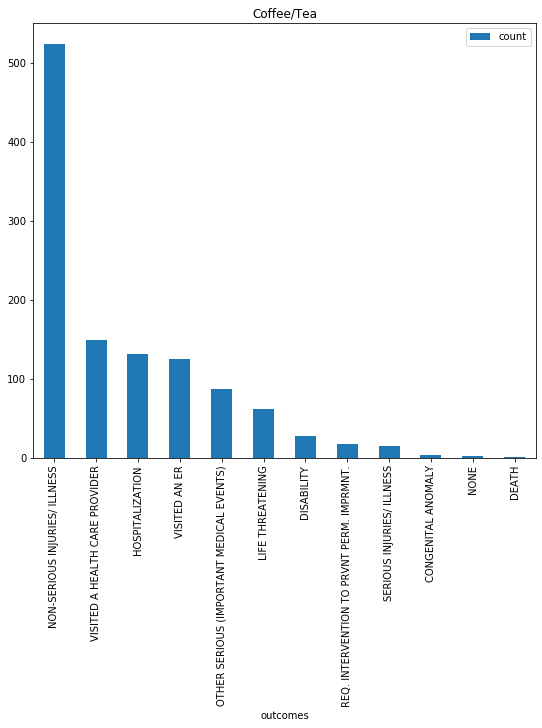

In [111]:
for industry in top_15_industries_by_freq:
    plot_df=df2.loc[df2['PRI_FDA Industry Name'] == str(industry)].sort_values('count', ascending=False)[:15]
    plot_df.plot(x='outcomes',y= "count", kind="bar", figsize=(9, 8))
    plt.title(industry)
    plt.show()

In [113]:
# Renaming columns
df = df.rename(columns = {
    'SYM_One Row Coded Symptoms': 'Symptoms',
    'AEC_One Row Outcomes': 'Outcomes',
    'CI_Gender': 'Gender',
    'CI_Age Unit': 'Age',
    'CI_Age at Adverse Event': 'Age_at_event',
    'PRI_FDA Industry Name': 'Industry',
    'PRI_FDA Industry Code': 'Industry_code',
    'PRI_Reported Brand/Product Name': 'Product_name', 
    'PRI_Product Role': 'Product_role', 
    'AEC_Event Start Date': 'Reported_date', 
    'RA_CAERS Created Date': 'Entered_date', 
    'RA_Report #': 'ID'
})
df[['ID',
'Entered_date',
'Reported_date',
'Product_role',
'Product_name',
'Industry_code',
'Industry',
'Age_at_event',
'Age',
'Gender',
'Outcomes',
'Symptoms']].isna().sum()

ID                   0
Entered_date         0
Reported_date    37133
Product_role         0
Product_name         0
Industry_code        0
Industry             0
Age_at_event     37860
Age                  0
Gender               0
Outcomes             0
Symptoms             5
dtype: int64